# Statistics from Insight problems



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate

# Code formatting
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

**Some math markdown notations**

[Writing math symbols in markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)

$\bar{x}$
$\pm$
$2se(\bar{x})$

= 5.447931 $\pm$ 2 x 0.04102858 = 5.447931 $\pm$ 0.08205717

$\bar{x}$
$\bar{X}$
$se(\bar{x})$ = 

$\frac{s_X}{\sqrt(n)}$ = $\frac{0.22094577}{\sqrt29}$ 
$\mu$
$\hat{p}$
$\hat{P}$


# Bootstrapping exercise

Questions with Prodyumna. Testing fundamentals of probability theory and minor coding as minor element.

Choosing to join Insight is a risky life choice. Consider three possible outcomes of attending Insight:
With probability 65%, you get a great job which pays well (how well is well? you ask. for the sake of this exercise let's say 100,000). With probability 30, you get a less great job which only pays half i.e. 50,000. Finally and sadly, with probability 5%, you don't get a job i.e. make 0.

## Calculate the expected value

In [3]:
exp_val = 100000 * 0.65 + 50000 * 0.3 + 0 * 0.05
print(exp_val)

80000.0


<IPython.core.display.Javascript object>

## Determine SD?

## Write a simulation to calculate expected value

My strategy
- Make a list of values - make draws

In [4]:
simulated_vals = [100000] * 65 + [50000] * 30 + [0] * 5

<IPython.core.display.Javascript object>

In [5]:
# Make repeated draws
draws = np.random.choice(simulated_vals, 100)

<IPython.core.display.Javascript object>

In [6]:
draws

array([100000, 100000,      0, 100000, 100000, 100000, 100000,  50000,
       100000, 100000,      0, 100000, 100000, 100000, 100000,  50000,
       100000,  50000,  50000, 100000,  50000, 100000, 100000,  50000,
       100000, 100000, 100000,  50000, 100000, 100000,  50000,  50000,
       100000,  50000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000,  50000,      0, 100000, 100000,
       100000, 100000, 100000,  50000,  50000,  50000,  50000, 100000,
       100000, 100000, 100000, 100000, 100000,  50000, 100000, 100000,
       100000, 100000, 100000, 100000,  50000, 100000,      0, 100000,
       100000, 100000,  50000,  50000, 100000, 100000,  50000, 100000,
       100000, 100000, 100000,  50000, 100000,  50000, 100000, 100000,
       100000, 100000, 100000, 100000,  50000,  50000, 100000, 100000,
       100000, 100000, 100000,      0])

<IPython.core.display.Javascript object>

In [7]:
# Add them up and divide by number of draws
np.mean(draws)

83000.0

<IPython.core.display.Javascript object>

In [8]:
draws = np.random.choice(simulated_vals, 10000)
np.mean(draws)

79715.0

<IPython.core.display.Javascript object>

## Imagine you have a survey of 50 Insight fellows

Construct a dataframe of fellow_id
- column 1, fellow id: 0-49
- column 2, draw from normal distribution, with mean 80,0000 and standard deviation of 20,000

In [9]:
df_salary = pd.DataFrame()
df_salary["fellow_id"] = range(50)
df_salary["salary"] = np.random.normal(80000, 20000, 50)

<IPython.core.display.Javascript object>

In [10]:
df_salary.head()

,fellow_id,salary
0,0,85250.620024
1,1,66327.389611
2,2,52720.196947
3,3,102795.543800
4,4,85361.086494


<IPython.core.display.Javascript object>

In [11]:
# salary = pd.DataFrame({'fellow_id':range(50),
#                       'salary':np.random.normal(80000,20000,50)})

<IPython.core.display.Javascript object>

In [22]:
# What is mean of the salary?

In [12]:
df_salary["salary"].mean()

81200.73977072988

<IPython.core.display.Javascript object>

### Calculate the 95% CI around this mean

Is the 50 the "population"? Or is it a sample of the population?

**Using SD**

In [13]:
lower_bound = df_salary["salary"].mean() - 1.96 * df_salary["salary"].std()
upper_bound = df_salary["salary"].mean() + 1.96 * df_salary["salary"].std()

print("SD: ", lower_bound, upper_bound)

SD:  53678.20405688572 108723.27548457404


<IPython.core.display.Javascript object>

**Use standard error**

In [14]:
lower_bound = df_salary["salary"].mean() - 1.96 * (
    df_salary["salary"].std() / np.sqrt(50)
)
upper_bound = df_salary["salary"].mean() + 1.96 * (
    df_salary["salary"].std() / np.sqrt(50)
)

print("SE: ", lower_bound, upper_bound)

SE:  77308.46544298825 85093.01409847151


<IPython.core.display.Javascript object>

## Simulation to get CI

Bootstrap = repeat with replacement

In [46]:
df_salary.head()

,fellow_id,salary
0,0,85250.620024
1,1,66327.389611
2,2,52720.196947
3,3,102795.543800
4,4,85361.086494


<IPython.core.display.Javascript object>

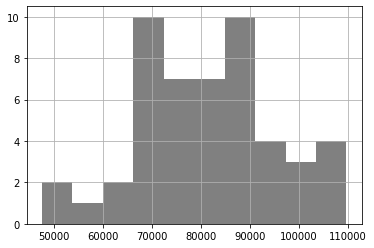

<IPython.core.display.Javascript object>

In [47]:
df_salary["salary"].hist(color="gray")

### Understanding sampling with replacement

In [49]:
df_salary[0:3].sample(3, replace=True)

,fellow_id,salary
2,2,52720.196947
1,1,66327.389611
2,2,52720.196947


<IPython.core.display.Javascript object>

In [50]:
df_salary[0:3].sample(3, replace=False)

,fellow_id,salary
1,1,66327.389611
0,0,85250.620024
2,2,52720.196947


<IPython.core.display.Javascript object>

### Connecting sampling with replacement and t-test

In [22]:
from scipy.stats import ttest_ind
from scipy.stats import norm  # for getting probability of z values
from scipy.stats import t     # for getting probability of t values

<IPython.core.display.Javascript object>

In [73]:
# Create dummy sets

salary1 = pd.DataFrame(
    {"fellow_id": range(50), "salary": np.random.normal(80000, 20000, 50)}
)

salary2 = pd.DataFrame(
    {"fellow_id": range(50), "salary": np.random.normal(85000, 20000, 50)}
)

<IPython.core.display.Javascript object>

(array([ 1.,  2.,  6.,  2., 12.,  4., 12.,  6.,  2.,  3.]),
 array([ 33477.70228329,  42210.49965986,  50943.29703643,  59676.094413  ,
         68408.89178957,  77141.68916615,  85874.48654272,  94607.28391929,
        103340.08129586, 112072.87867244, 120805.67604901]),
 <a list of 10 Patch objects>)

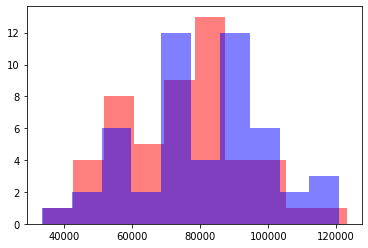

<IPython.core.display.Javascript object>

In [89]:
f, ax1 = plt.subplots()
ax1.hist(salary1["salary"], color="red", alpha=0.5)
ax1.hist(salary2["salary"], color="blue", alpha=0.5)

#### Do a t-test on the original data

In [92]:
t_stat, pval = ttest_ind(salary1["salary"], salary2["salary"], equal_var=True)
print("t-statistic: ", t_stat, "p-value: ", pval)

t-statistic:  -1.5270641419819928 p-value:  0.12996621628239335


<IPython.core.display.Javascript object>

In [131]:
# Manually check

# This is the standard error of the difference
np.sqrt(
    (salary1["salary"].std() / np.sqrt(50)) ** 2
    + (salary2["salary"].std() / np.sqrt(50)) ** 2
)

3772.2135441151054

<IPython.core.display.Javascript object>

In [132]:
# This is the t-statistic
(salary1["salary"].mean() - salary2["salary"].mean()) / 3772

-1.5271505936153196

<IPython.core.display.Javascript object>

In [133]:
# This is calculating the 2-sided probability for this t-statistic
2 * t.cdf(x=-1.52715, df=98)

0.12994488396420456

<IPython.core.display.Javascript object>

#### Generate means of re-sampled data (n=50) (bootstrap)

In [93]:
resample1_salary_means = list()
resample2_salary_means = list()
for i in range(1000):
    resample1_salary = salary1.sample(n=50, replace=True).copy()["salary"]
    resample1_salary_means.append(resample1_salary.mean())

    resample2_salary = salary2.sample(n=50, replace=True).copy()["salary"]
    resample2_salary_means.append(resample2_salary.mean())

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'sampling distribution of means')

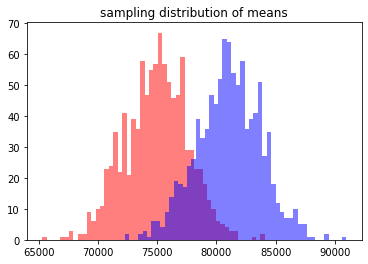

<IPython.core.display.Javascript object>

In [137]:
f, ax1 = plt.subplots()
ax1.hist(resample1_salary_means, bins=50, color="red", alpha=0.5)
ax1.hist(resample2_salary_means, bins=50, color="blue", alpha=0.5)
ax1.set_title("sampling distribution of means")

In [95]:
mean1 = pd.Series(resample1_salary_means).mean()
mean2 = pd.Series(resample2_salary_means).mean()

print("Means of distributions of sample means for each group: ", mean1, mean2)
print(
    "Means of original sample (for comparison): ",
    salary1["salary"].mean(),
    salary2["salary"].mean(),
)

Means of distributions of sample means for each group:  74924.62200634298 81033.65560450291
Means of original sample (for comparison):  75035.72800765448 80796.14004677147


<IPython.core.display.Javascript object>

In [78]:
sd1 = pd.Series(resample1_salary_means).std()
sd2 = pd.Series(resample2_salary_means).std()
print("Standard deviations of distributions of sample means for each group: ", sd1, sd2)

Standard deviations of distributions of sample means for each group:  2662.9736639582857 2636.3288892079313


<IPython.core.display.Javascript object>

**What does a distribution of the difference look like?**

In [114]:
mean_diff = mean1 - mean2
sd_diff = np.sqrt(sd1 ** 2 + sd1 ** 2)
print("Mean difference: ", mean_diff, "SD of difference: ", sd_diff)

Mean difference:  -6109.033598159935 SD of difference:  3766.0134718121803


<IPython.core.display.Javascript object>

In [138]:
# confidence interval
lower_bound = mean_diff - 1.96 * sd_diff
upper_bound = mean_diff + 1.96 * sd_diff
print(lower_bound, upper_bound)

-13490.420002911807 1272.352806591939


<IPython.core.display.Javascript object>

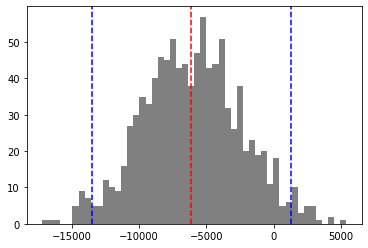

<IPython.core.display.Javascript object>

In [117]:
diff_array = np.random.normal(mean_diff, sd_diff, 1000)

f, ax = plt.subplots()
ax.hist(diff_array, bins=50, color="gray")
ax.axvline(mean_diff, color="red", linestyle="dashed")
ax.axvline(lower_bound, color="blue", linestyle="dashed")
ax.axvline(upper_bound, color="blue", linestyle="dashed")

In [115]:
# Calculate z-statistic for difference
# No. of standard deviation away
z_sd = mean_diff / sd_diff
print(z_sd)

-1.6221486311413296


<IPython.core.display.Javascript object>

In [135]:
# When I do sample with replacement, use a z-table and use the SD of the bootstrap
print("one sided: ", norm.cdf(-1.62214))
print("two sided: ", norm.cdf(-1.62214) * 2)

one sided:  0.05238668758873186
two sided:  0.10477337517746373


<IPython.core.display.Javascript object>

In [136]:
# In a two sample difference, the df is n1 + n2 - 2 (from above)
print("one sided: ", t.cdf(-1.527, df=98))
print("two sided: ", t.cdf(-1.527, df=98) * 2)

one sided:  0.06499107741325975
two sided:  0.1299821548265195


<IPython.core.display.Javascript object>

**Proportion of samples above the upper bound**

In [118]:
(diff_array > upper_bound).sum() / len(diff_array)

0.027

<IPython.core.display.Javascript object>

**Proportion of samples below the lower bound**

In [119]:
(diff_array < lower_bound).sum() / len(diff_array)

0.024

<IPython.core.display.Javascript object>

## Understanding power

The probability of not detecting a false negative

1 - pr(type II error)

### Vary sample size

### How does the number of draws in sampling with replacement affect the SD?

Keep sample size constant

In [41]:
# 10 draws
resample_test_1_salary_means = list()
for i in range(10):
    resample_test_1_salary = salary1.sample(n=50, replace=True).copy()["salary"]
    resample_test_1_salary_means.append(resample_test_1_salary.mean())

print(
    "SD of 10 draws, sample size of 50: ", pd.Series(resample_test_1_salary_means).std()
)

SD of 10 draws, sample size of 50:  1791.3232360646666


<IPython.core.display.Javascript object>

In [42]:
# 50 draws
resample_test_1_salary_means = list()
for i in range(50):
    resample_test_1_salary = salary1.sample(n=50, replace=True).copy()["salary"]
    resample_test_1_salary_means.append(resample_test_1_salary.mean())

print(
    "SD of 50 draws, sample size of 50: ", pd.Series(resample_test_1_salary_means).std()
)

SD of 50 draws, sample size of 50:  2543.4548763118532


<IPython.core.display.Javascript object>

In [43]:
# 500 draws
resample_test_1_salary_means = list()
for i in range(500):
    resample_test_1_salary = salary1.sample(n=50, replace=True).copy()["salary"]
    resample_test_1_salary_means.append(resample_test_1_salary.mean())

print(
    "SD of 500 draws, sample size of 50: ",
    pd.Series(resample_test_1_salary_means).std(),
)

SD of 500 draws, sample size of 50:  2437.972983160939


<IPython.core.display.Javascript object>

In [44]:
n_draws = range(10, 500, 10)
means_list = list()
sd_list = list()

for draw in n_draws:
    resample_test_1_salary_means = list()
    for i in range(draw):
        resample_test_1_salary = salary1.sample(n=50, replace=True).copy()["salary"]
        resample_test_1_salary_means.append(resample_test_1_salary.mean())
    means_list.append(pd.Series(resample_test_1_salary_means).mean())
    sd_list.append(pd.Series(resample_test_1_salary_means).std())

<IPython.core.display.Javascript object>

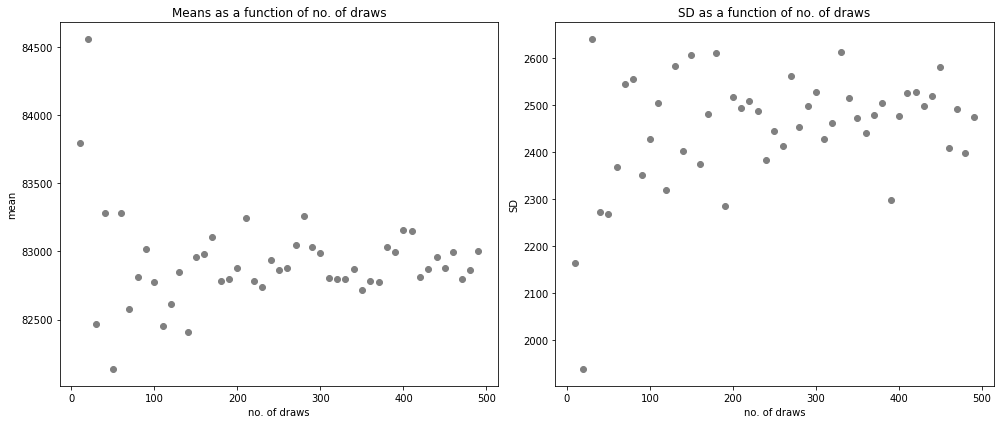

<IPython.core.display.Javascript object>

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(n_draws, means_list, color="gray")
ax1.set_title("Means as a function of no. of draws")
ax1.set_xlabel("no. of draws")
ax1.set_ylabel("mean")

ax2.scatter(n_draws, sd_list, color="gray")
ax2.set_title("SD as a function of no. of draws")
ax2.set_xlabel("no. of draws")
ax2.set_ylabel("SD")

plt.tight_layout()

## Followup 4/13/20

- t-test is under the condition that the null is true, simulate based on that mean
- bootstrap, generate instance of that t
- bootstrap means you can calculate statistics without invoking the machinery of t-statistics
- imagine that there's some quirk in the data, start with a one-sample test and see if it's equal to the mean

# A/B test - Jeremy teachback

## Session 1

- when to apply CLT

- specifying the population or the sample

- using confidence intervals vs where it falls in the rejection region of the null hypothesis; versus the difference

- slides available?

- crime scene problem

- computing power (alternative hypothesis)



Ratio of null to alternative

## Session 2 4/16/20

Bootstrap numerically approximates the uncertainty in a test statistic due to the sampling process. A bootstrap sample of X is a sample (with the same size as X) drawn with replacement from X.

quantile CI

- looks like lower and upper bound of interval

lower = np.quantile(X-btstrp, alpha/2)
upper = np.quantile(X-btstrp, 1-alpha/2)

# Questions from Insight forum

## When should you use one-sided vs. two-sided hypothesis tests for A/B-testing? 

@Katja, here are some pages out a textbook I have.
@Nathan, I agree that's a cool post and StitchFix's other blog articles look nice.

As Jeremy said, the two-sided hypothesis test means that the estimate in the alternate hypothesis can be further away from the parameter in *either direction* (either much smaller or much larger). So in your red circled statements, therefore, I believe it is okay to have directionality in both directions. With regards to your first question, possibly one A/B test scenario could be that you're deciding between two different website designs (A and B) but you don't know which would be better. Since you're open to either being better you could use a two-sided test. A different scenario might be that you have a baseline design (A) and you think that an alternate design (B) could be better. This scenario doesn't preclude using a two-sided test, but since you care about the directionality (B > A) then you could use a one-sided test. Why use a one-sided test when you can still answer your question in a two-sided test? From what I think the StitchFix post is saying and from other sources I can find, the most immediate benefit is that you can use lower sample sizes to reach significance in a one-sided test.

## Crime scene

 Suppose a crime has been committed. Blood is found at the scene for which there is no innocent explanation. It is of a type which is present in 1% of the population.
a. The prosecutor claims: “There is a 1% chance that the defendant would have the crime blood type if he were innocent. Thus there is a 99% chance that he guilty”. This is known as the prosecutor’s fallacy. What is wrong with this argument?

In [ ]:
total_pop = 1000
n_people = 0.01*total_pop

The prosecutor is connecting the prevalence of blood type in the population with guilt.

- The prevalence of the blood type might be at a higher rate closer to the scene. 1% could be the percentage for a whole city but the rate is higher in a certain neighborhood demographic.
- It does not factor into the 

Revisit: https://en.wikipedia.org/wiki/Prosecutor%27s_fallacy

# Questions of the day (4/3/20)

## Bobo problem

1) Bobo the amoeba has a 25%, 25%, and 50% chance of producing 0, 1, or 2 offspring, respectively. Each of Bobo’s descendants also have the same probabilities. What is the probability that Bobo’s lineage dies out?

# QotD (4/15/20)

## Fishermen problem

If two fishermen catch two fish in two minutes, how many fish will be caught by 500 men in 500 minutes?

250K fish

# QotD (4/20/20)

# --- 